## 无框架多层神经网络猫狗分类
使用numpy 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(121)

### 1. 多层神经网络每一层输入输出维度关系
由于需要从头开始实现神经网络， 在争相传播和反向传播时， 需要矩阵运算维度保持匹配。 在开工支之前先把维度弄清楚。
比如输入层X维度是$(n^{[1]}=12288,m^{[1]}=209)$, 也就是特征有12288维， 样品数209个。具体维度如下：


<table style="width:100%">
	<tr>
		<th>网络层数</th>
		<th>W维度</th>
		<th>b维度</th>
		<th>Z值</th>
		<th>A维度</th>
	</tr>
	<tr>
		<td>Layer 1</td>
		<td>$(n^{[1]}, 12288)$</td>
		<td>$(n^{[1]}, 1)$</td>
		<td>$Z^{[1]}=W^{[1]}X + b^{[1]}$</td>
		<td>$(n^{[1]}, 209)$</td>
	</tr>

	<tr>
		<td>Layer 2</td>
		<td>$(n^{[2]}, n^{[1]})$</td>
		<td>$(n^{[2]}, 1)$</td>
		<td>$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$</td>
		<td>$(n^{[2]}, 209)$</td>
	</tr>

	<tr>
        	<td>$\vdots$</td> 
        	<td>$\vdots$</td> 
        	<td>$\vdots$</td> 
        	<td>$\vdots$</td> 
        	<td>$\vdots$</td> 
	</tr>

	<tr>
		<td>Layer L-1</td>
		<td>$(n^{[L-1]}, n^{[L-2]})$</td>
		<td>$(n^{[L-1]}, 1)$</td>
		<td>$Z^{[L-1]}=W^{[L-1]}A^{[L-2]} + b^{[L-2]}$</td>
		<td>$(n^{[L-1]}, 209)$</td>
	</tr>
	
	<tr>
		<td>Layer L</td>
		<td>$(n^{[L]}, n^{[L-1]})$</td>
		<td>$(n^{[L]}, 1)$</td>
		<td>$Z^{[L]}=W^{[L-1]}A^{[L-1]} + b^{[L-1]}$</td>
		<td>$(n^{[L]}, 209)$</td>
	</tr>
	
</table>

网络基本构成如下：
[Linear --> RELU](L-1层) --> [Linear --> Sigmoid]

### 4. 向后传播（Backward Propagation）
向后传播涉及一系列链式求导。中间L-1层的一系列梯度如下。 

激活函数的梯度

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$

线性函数梯度
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$

而第L层的dAL如下：
$$dAL=\frac{\partial{J}}{\partial{A^{[L]}}}=-(\frac{Y}{A^{[L]}}-\frac{1-Y}{1-A^{[L]}})$$


#### 4.1 激活函数梯度
为了后面计算起来方便，先来写激活函数的梯度
**Relu**

### 3. 权值初始化
* 对于神经网络而言， 不能把多神经元的W全部初始化为0， 如果的这样的话， 训练出来每个神经元结果完全一样。 效果等同于一个逻辑回归函数。 
* 为了保证多层变换以后不至于输出结果过大导致梯度爆炸，初始权值尽量小一些。 使用np.random.randn(shape)*0.01初始化W
* b可以初始位0， np.zeros(shape)

In [3]:
def l_layer_init(layer_dims_list, init_w):
    """
    
    :param 
        list_layer_dims -- python list of dims of each layer. Each element is a int number of hidden unit
        init_w -- a ratio to justify params
    :return: 
        param_weights: python dict of W,b for each layers
    """
    L = len(layer_dims_list)
    param_weights = {}
    np.random.seed(121)
    for l in range(1, L):
        param_weights['W'+str(l)] = np.random.randn(layer_dims_list[l],layer_dims_list[l-1]) * init_w
        param_weights['b'+str(l)] = np.zeros([layer_dims_list[l], 1])
    return param_weights      

假设初始一个3层网络， 输入特征10维，第二层，3个hidden unit, 输出层1维。 隐藏层和输出层的参数权重维度应该是
W1(3,10), b1(3,1), W2(1, 3), b2(1, 1), 测试一下上述函数。 

In [4]:
test_dims_list = [10, 3, 1]
test_params_weights = l_layer_init(test_dims_list)
print('W1')
print(test_params_weights['W1'].shape)
print('b1')
print(test_params_weights['b1'].shape)
print('\nW2')
print(test_params_weights['W2'].shape)
print('b2')
print(test_params_weights['b2'].shape)

TypeError: l_layer_init() missing 1 required positional argument: 'init_w'

### 2. 向前传播Forward Propagation
向前传播包括两部分变换
* 线性变换
* 非线性激活函数变换
因此需要把需要的激活函数定义出来。 这个项目中， 隐藏层使用relu函数， 输出层牵扯到分类问题，使用sigmoid函数。

In [5]:
def relu(Z):
    cache = Z
    A = np.maximum(0, Z)
    return A, cache

def sigmoid(Z):
    cache = Z
    A = 1/(1+np.exp(-Z))
    return A, cache

激活函数定义完毕后，准备定义forward_propagation函数
#### 2.2 定义向前传播函数
* 第一层网络， $A^{[0]}=X$
* 前L-1层网络，$Z^{[l]}=W^{[l]}A^{[l-1]} + b^{[l]}，A^{[l]}=Relu(Z^{[l]})$
* 第L层网络， $Z^{[L]}=W^{[L]}A^{[L-1]} + b^{[L]}，A^{[L]}=sigmoid(Z^{[L]})$

In [6]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == 'relu':
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)
    return A, cache


def forward_propagation(X, param_weights):
    """
    :param param_weights: python dict of parameters weights
    :param X: input matrix
    
    :return: 
    AL -- output layer activation value
    caches -- list of caches containing Z value for each layer
    """
    caches = []
    A = X
    L = len(param_weights)//2
    
    ## impelment [linear --> relu]*(L-1) --> [linear --> sigmoid]
    
    ## L-1 layers
    for l in range(1, L):
        A_prev = A
        Wl, bl = param_weights['W' + str(l)], param_weights['b'+str(l)]
        A, cache = linear_activation_forward(A_prev, Wl, bl, 'relu')
        caches.append(cache)
    WL, bL = param_weights['W' + str(L)], param_weights['b' + str(L)]
    AL, cache = linear_activation_forward(A, WL, bL, 'sigmoid')
    caches.append(cache)
    return AL, caches

### 3. Cost 函数
由于是二分类问题， 因此使用交叉熵来描述损失函数

$J(W,b)=\frac{1}{m}\sum_{i=1}^{m}((y^{(i)}log(a^{[L](i)})+(1-y^{(i)})log(1-a^{[L](i)}))$

In [7]:
def cost(AL, Y):
    """
    :param AL: output layer activation value
    :param Y: label values 
    :return: entropy cost
    """
    m = Y.shape[1]
    J = - 1/m * (np.dot(Y, np.log(AL.T)) + np.dot(1-Y, np.log(1-AL.T)))
    J = np.squeeze(J)
    return J

### 4. 向后传播（Backward Propagation）
向后传播涉及一系列链式求导。中间L-1层的一系列梯度如下。 

激活函数的梯度

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$

线性函数梯度
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$

而第L层的dAL如下：
$$dAL=\frac{\partial{J}}{\partial{A^{[L]}}}=-(\frac{Y}{A^{[L]}}-\frac{1-Y}{1-A^{[L]}})$$


#### 4.1 激活函数梯度
为了后面计算起来方便，先来写激活函数的梯度
**Relu**

In [8]:
def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z<=0] = 0
    return dZ 


**sigmoid**

In [9]:
def sigmoid_backward(dA, Z):
    a = 1/(1+np.exp(-Z))
    dZ = dA * a * (1-a)
    return dZ

#### 4.2 线性好书梯度

In [10]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

#### 4.3 一层网络中的backward
上面两步用到的函数连起来

In [11]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

#### 4.4 完整实现Backward Propagation
把上面的函数串起来，放到L层网络里面，完整实现BP

In [12]:
def backward_propagation(AL, Y, caches):
    grads = {}
    L = len(caches)
  #  m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    # Initialization of dAL
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = \
        linear_activation_backward(dAL, current_cache,'sigmoid')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = \
            linear_activation_backward(grads["dA"+str(l+2)], current_cache, 'relu')
        grads['dA' + str(l + 1)] = dA_prev_temp
        grads['dW' + str(l + 1)] = dW_temp
        grads['db' + str(l + 1)] = db_temp
    
    return grads

### 5. 梯度下降法更新权值

$W^{[l]}=W^{[l]}-\alpha{dW^{[l]}}$

$b^{[l]}=b^{[l]}-\alpha{db^{[l]}}$

In [13]:
def update_parameters(param_weights, grads, learning_rate):
    L = len(param_weights)//2
    for l in range(1, L+1):
        param_weights['W' + str(l)] = param_weights['W' + str(l)] - learning_rate*grads['dW' + str(l)]
        param_weights['b' + str(l)] = param_weights['b' + str(l)] - learning_rate*grads['db' + str(l)]
    return param_weights

In [14]:
### 6. 最终L层深度神经网络函数
def L_layer_model(X, Y, layers_dims_list, learning_rate = 0.01, num_iterations = 3000, init_w=0.01):
    np.random.seed(121)
    costs = []
    params_weights = l_layer_init(layers_dims_list, init_w)
    for i in range(num_iterations):
        AL, caches = forward_propagation(X, params_weights)
        J = cost(AL, Y)
        costs.append(J)
        grads = backward_propagation(AL, Y, caches)
        params_weights = update_parameters(params_weights, grads, learning_rate)
        if i % 10000 == 0:
            print ("Cost after iteration %i: %f" %(i, costs[-1]))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return params_weights

def predict(X, y, params_weight):
    m = X.shape[1]
    p = np.zeros([1, m])
    prob, _ = forward_propagation(X, params_weight)
    
    for i in range(0, prob.shape[1]):
        if prob[0, i]> 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
    print("Accuracy: " + str(np.sum((p==y)/m)))
    return p
        

### 7. 导入数据进行实验
#### 7.1 导入图片数据
导入图片简单展示一下数据， 为了计算方便， 把突变转成64x64x3的维度。 

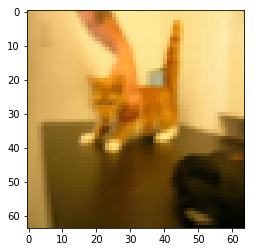

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import os
import glob


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
np.random.seed(1)


each_image = 'datasets/train/cat.0.jpg'
image = np.array(ndimage.imread(each_image, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64))
plt.imshow(my_image)


把读入图片的部分写成函数， 方便把原始数据转化为可以运算的矩阵

In [16]:

def load_image(image):
    ## load and preprocess image
    each_image = np.array(ndimage.imread(image, flatten=False))
    each_image = scipy.misc.imresize(each_image, size=(64,64)).reshape((64*64*3,1))
    each_image_x = each_image/255
    
    ## generate label
    if os.path.basename(image).split(".")[0].strip().lower() == 'cat':
        each_image_y = 1
    else:
        each_image_y = 0
    return each_image_x, each_image_y

def load_data(data_dir):
    image_list = glob.glob(data_dir + "/*.*.jpg")
    print(image_list[0:10])
    data_X = []
    data_Y = []
    for image in image_list:
        image_x, image_y = load_image(image)
        data_X.append(image_x)
        data_Y.append(image_y)
    
    return np.concatenate(data_X, axis=1), np.array(data_Y).reshape((1, len(image_list)))

data, label = load_data("datasets/train_small")
print(data.shape, label.shape)
print(label[0, 0:10])


['datasets/train_small/cat.6.jpg', 'datasets/train_small/dog.36.jpg', 'datasets/train_small/dog.22.jpg', 'datasets/train_small/cat.30.jpg', 'datasets/train_small/cat.24.jpg', 'datasets/train_small/cat.18.jpg', 'datasets/train_small/cat.19.jpg', 'datasets/train_small/cat.25.jpg', 'datasets/train_small/cat.31.jpg', 'datasets/train_small/dog.23.jpg']


(12288, 102) (1, 102)
[1 0 0 1 1 1 1 1 1 0]


分训练和测试数据集。 我们取百分之20作为测试数据

In [130]:
np.random.seed(111)
ridx = np.random.randint(0, 102, 20)
data_test = data[:, ridx]
label_test = label[:, ridx]
print("Test set shape:")
print(data_test.shape, label_test.shape)

mask = np.ones(102, np.bool)
mask[ridx] = 0
data_train = data[:, mask]
label_train = label[:, mask]
print("Train set shape:")
print(data_train.shape, data_train.shape)


Test set shape:
(12288, 20) (1, 20)
Train set shape:
(12288, 84) (12288, 84)


#### 7.2 训练模型权值参数
准备选择一个小一点的网络，试试水，免得机器扛不住

Cost after iteration 0: 0.693147


Cost after iteration 10000: 0.693147


Cost after iteration 20000: 0.693147


Cost after iteration 30000: 0.693147


Cost after iteration 40000: 0.693147


Cost after iteration 50000: 0.693146


Cost after iteration 60000: 0.693145


Cost after iteration 70000: 0.693143


Cost after iteration 80000: 0.693132


Cost after iteration 90000: 0.686717


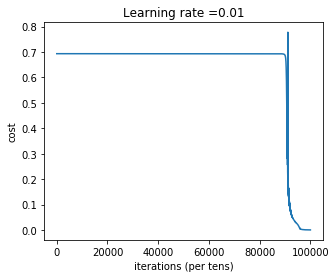

Accuracy: 1.0


In [19]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

## training 
param_weights = L_layer_model(data_train,  label_train, layers_dims, num_iterations = 100000, learning_rate=0.01, init_w = 0.01)

## predict on training set
p = predict(data_train, label_train, param_weights)

迭代了十万次终于收敛了， 我想可能是因为权值初始化的时候初始化的太小了， 导致梯下降缓慢， 产生了所谓梯度消失现象。下面调整一下init_w系数看看结果如何。 

Cost after iteration 0: 0.693139


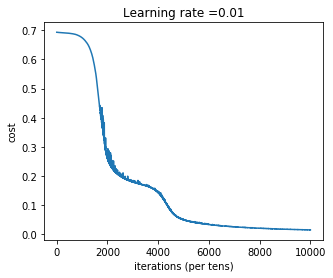

Accuracy: 1.0


In [219]:
## training 
param_weights = L_layer_model(data_train,  label_train, layers_dims, num_iterations = 10000, learning_rate=0.01, init_w = 0.1)

## predict on training set
p = predict(data_train, label_train, param_weights)

收敛要迅速多了，几千个循环就收敛了。 再试试init_w 设置为1时候什么现象。

/Users/MIAOKUI/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in exp
/Users/MIAOKUI/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log
/Users/MIAOKUI/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
/Users/MIAOKUI/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/MIAOKUI/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/Users/MIAOKUI/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()


Cost after iteration 0: inf


Cost after iteration 10000: nan


Cost after iteration 20000: nan


Cost after iteration 30000: nan


Cost after iteration 40000: nan


Cost after iteration 50000: nan


Cost after iteration 60000: nan


Cost after iteration 70000: nan


Cost after iteration 80000: nan


Cost after iteration 90000: nan


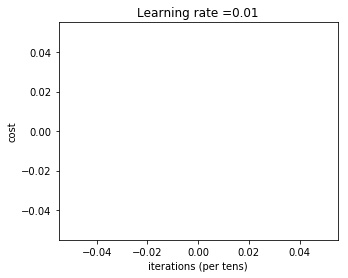

Accuracy: 0.5


In [220]:
## training 
param_weights = L_layer_model(data_train,  label_train, layers_dims, num_iterations = 100000, learning_rate=0.01, init_w = 1)

## predict on training set
p = predict(data_train, label_train, param_weights)

当权值W初始比较大的时候，发现损失函数和梯度就变得无限大， 这直接导致了梯度爆炸收敛失败。 

#### 7.3 训练和预测
用恰当的方式训练模型


['datasets/train/dog.8011.jpg', 'datasets/train/cat.5077.jpg', 'datasets/train/dog.7322.jpg', 'datasets/train/cat.2718.jpg', 'datasets/train/cat.3406.jpg', 'datasets/train/dog.1753.jpg', 'datasets/train/cat.4369.jpg', 'datasets/train/cat.7660.jpg', 'datasets/train/dog.5535.jpg', 'datasets/train/cat.8553.jpg']


Test set shape:
(12288, 20) (1, 20)
Train set shape:
(12288, 84) (12288, 84)
Cost after iteration 0: 0.693384


/Users/MIAOKUI/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 19219 but corresponding boolean dimension is 102
/Users/MIAOKUI/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 19219 but corresponding boolean dimension is 102


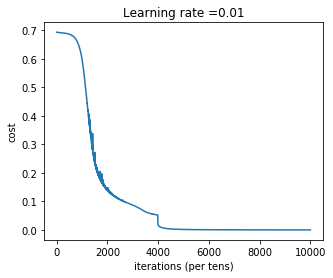

Testing on training set
Accuracy: 1.0
Testing on testing set
Accuracy: 0.75


In [19]:
## 使用完整训练集
data, label = load_data("datasets/train")
np.random.seed(111)
ridx = np.random.randint(0, 102, 20)
data_test = data[:, ridx]
label_test = label[:, ridx]
print("Test set shape:")
print(data_test.shape, label_test.shape)

mask = np.ones(102, np.bool)
mask[ridx] = 0
data_train = data[:, mask]
label_train = label[:, mask]
print("Train set shape:")
print(data_train.shape, data_train.shape)



## training 
param_weights = L_layer_model(data_train,  label_train, layers_dims, num_iterations = 10000, learning_rate=0.01, init_w = 0.1)
## testing on training set
print('Testing on training set')
_=predict(data_train, label_train, param_weights)
## testing on testing set
print('Testing on testing set')
_=predict(data_test, label_test, param_weights)